## Titanic Shipwreck Dataset

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.shape

(891, 12)

This dataset consists of 891 rows and 12 columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 3 columns with null values:
- Age: 177 null values
- Cabin: 687 null values
- Enbarked: 2 null values

As there are 687 null values in the Cabin feature, so we can drop this feature.

In [7]:
df = df.dropna()

### Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

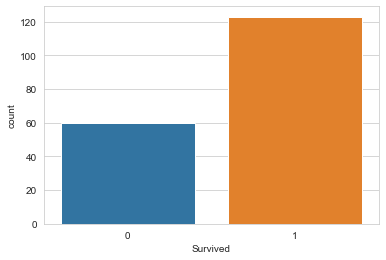

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

More number of passengers survived in the Titanic Shipwreck

In [9]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            6
        1           82
male    0           54
        1           41
Name: Survived, dtype: int64

C:\Users\kashi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

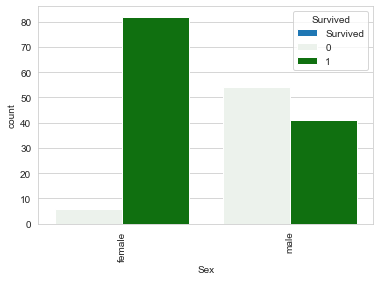

In [10]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

sns.countplot('Sex',hue='Survived',data=df,color="green")


### Inference:
- The death count of female passengers was very less compared to their survival count.
- More number of male passengers were died in the shipwreck.

In [11]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

C:\Users\kashi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

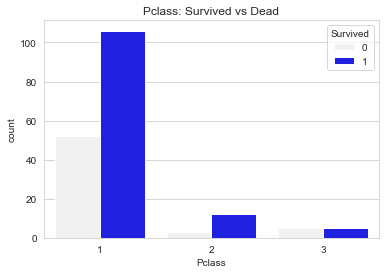

In [12]:
sns.countplot('Pclass', hue='Survived', data=df, color="blue")
plt.title('Pclass: Survived vs Dead')


### Inference:
- 1-class passengers have the maximun survival count.
- 2-class passengers have the least death rate.
- 3-class passengers have almost equal death and survival count.

<AxesSubplot:xlabel='Survived', ylabel='count'>

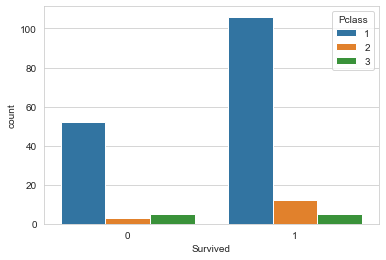

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df)

Inference:
Maximum 1st class passengers survived but the death count of 1st class was also maximum.


<AxesSubplot:xlabel='Survived', ylabel='count'>

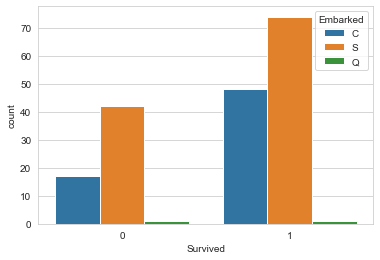

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Embarked', data=df)

In [15]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

### Inference:
- In 1st class, 3 females died while 49 males died.
- In 2nd class, 1 female died while 8 survived and 2 males dies out of 6.
- In 3rd class, 6 females died while 54 males died.

C:\Users\kashi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kashi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


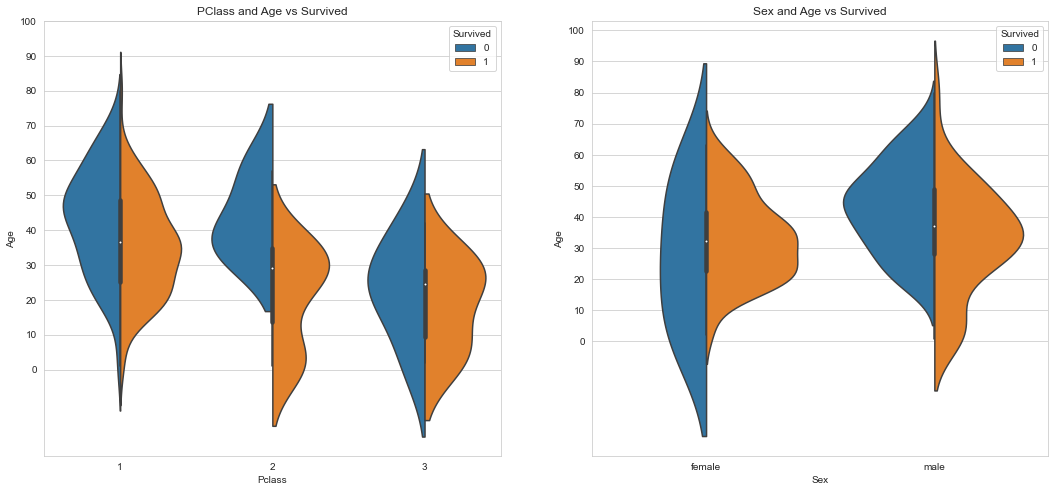

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))


### Inference:
- The median age of 3rd class people is less than 2nd class and median age of 2nd class people is less than the 3rd class.
- 1st class passengers death and survival count and normal distribution.
- Females have less range for not surviving.

<AxesSubplot:>

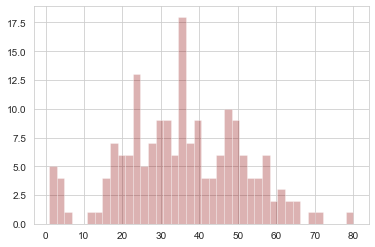

In [17]:
df['Age'].hist(bins=40,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

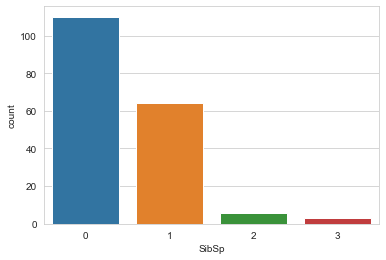

In [18]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

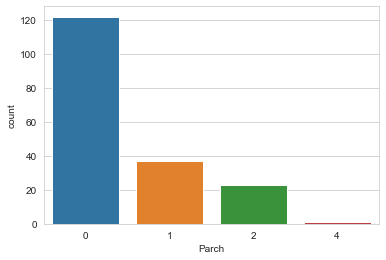

In [19]:
sns.countplot(x='Parch', data=df)

<AxesSubplot:>

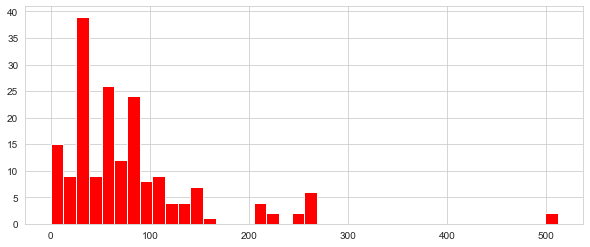

In [20]:
df['Fare'].hist(color='red', bins=40, figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

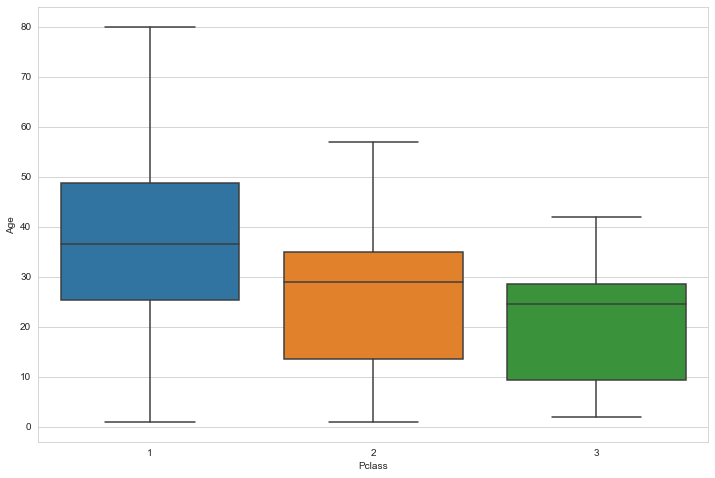

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

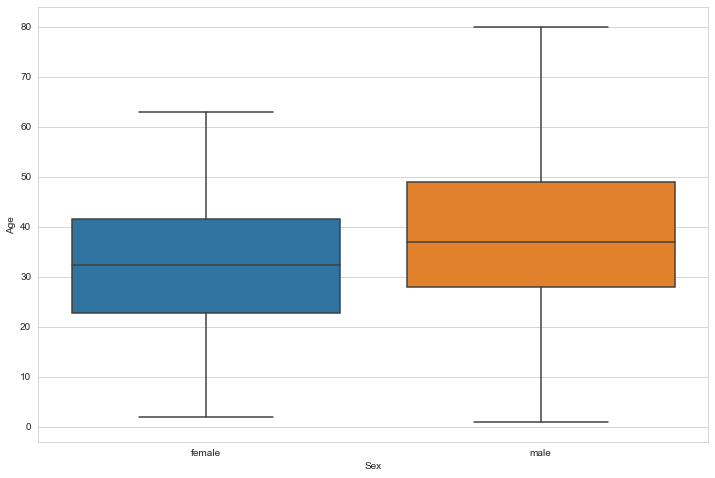

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Sex',y='Age',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

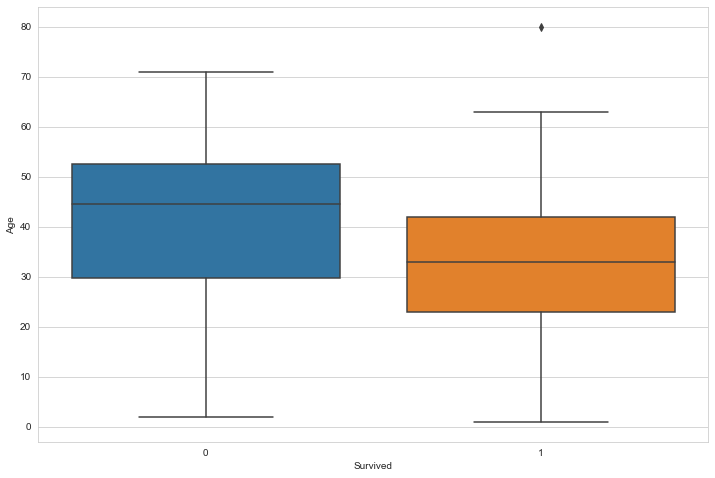

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Survived',y='Age',data=df)

Text(0.5, 1.05, 'Relation between age and fare')

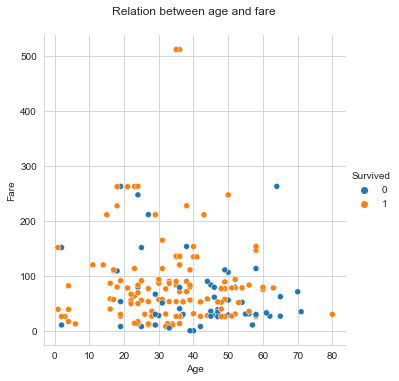

In [24]:
plot=sns.relplot(x='Age',y='Fare',data=df,hue='Survived')
plot.fig.suptitle('Relation between age and fare',y=1.05)

C:\Users\kashi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kashi\Anaconda\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

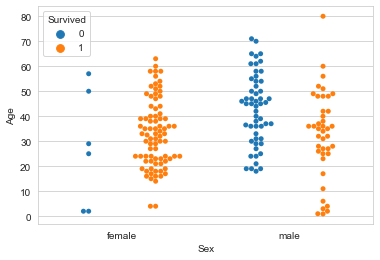

In [25]:
sns.swarmplot(df['Sex'],df['Age'],hue='Survived', data=df, split=True)

In [26]:
df_corr = df.corr()

<AxesSubplot:>

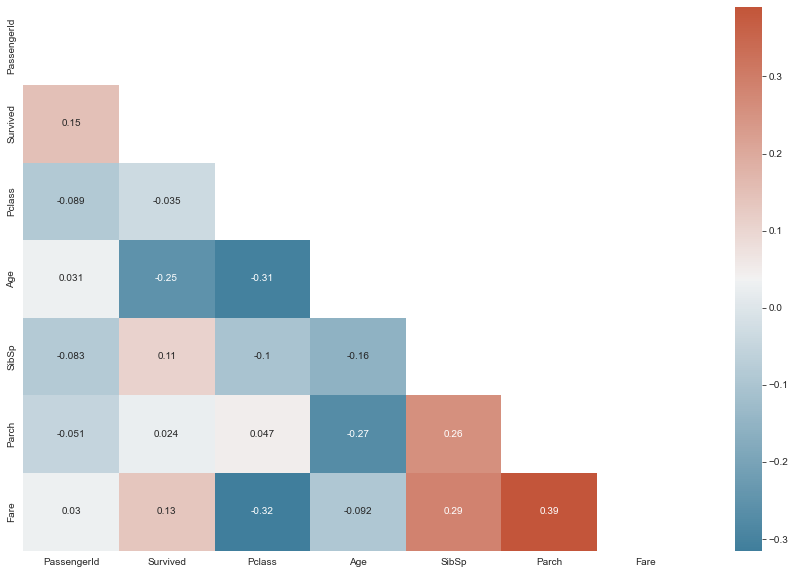

In [27]:
f, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), annot=True, mask = mask, cmap=cmap)

#### Creating a dataset of features having value more than the threshold value in correlation

In [28]:
def corr_feat(corr_data, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corr_data.index):
        if abs(corr_data[index])>=threshold:
            feature.append(index)
            value.append(corr_data[index])
            
    data = pd.DataFrame(data=value, index=feature, columns=['Corr_value'])
    return data

In [29]:
threshold = 0.15
corr_value = corr_feat(df_corr['Survived'], threshold)
corr_value

,Corr_value
Survived,1.000000
Age,-0.254085


In [30]:
corrdata = df[corr_value.index]
corrdata.head()

,Survived,Age
1,1,38.0
3,1,35.0
6,0,54.0
10,1,4.0
11,1,58.0


<AxesSubplot:>

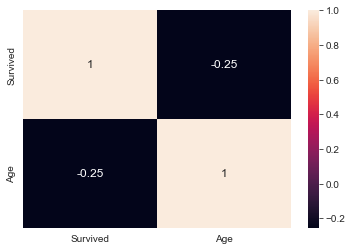

In [31]:
sns.heatmap(corrdata.corr(), annot=True, annot_kws={'size':12})

In [32]:
df.nunique()

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64

C:\Users\kashi\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kashi\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kashi\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

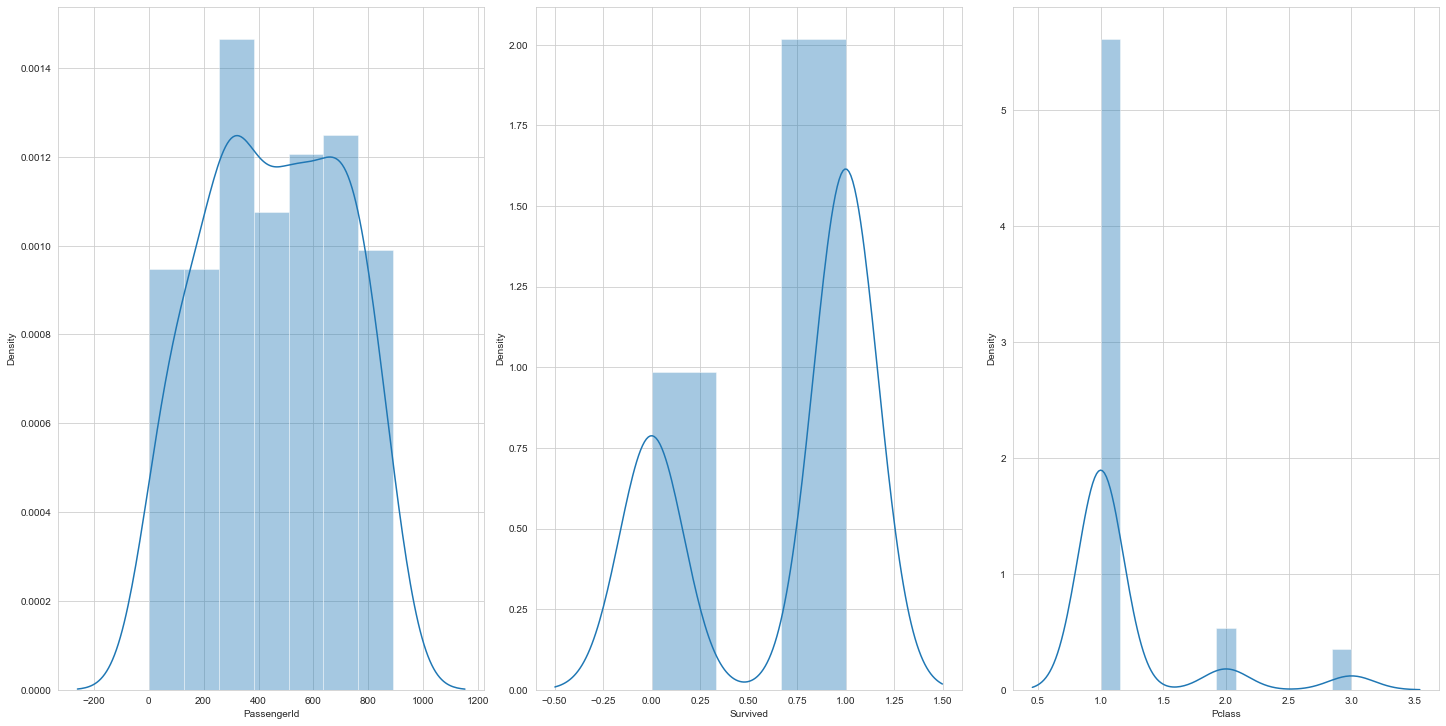

In [33]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    if index>=3:
        break
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Data Cleaning and Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label = LabelEncoder()

In [36]:
df['sex_num'] = label.fit_transform(df['Sex'])
df['embarked_num'] = label.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,embarked_num
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2


In [37]:
df = df.drop(["Cabin"], axis=1)
df = df.drop(["Name"], axis=1)
df = df.drop(["Ticket"], axis=1)
df = df.drop(["Sex"], axis=1)
df = df.drop(["Embarked"], axis=1)
df_shuff = df.sample(n=len(df))
X = df_shuff.drop(["Survived"], axis=1)
y = df_shuff["Survived"]

In [38]:
X.head() 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_num,embarked_num
632,633,1,32.0,0,0,30.5000,1,0
174,175,1,56.0,0,0,30.6958,1,0
23,24,1,28.0,0,0,35.5000,1,2
867,868,1,31.0,0,0,50.4958,1,2
505,506,1,18.0,1,0,108.9000,1,0


In [39]:
y.head()

632    1
174    0
23     1
867    0
505    0
Name: Survived, dtype: int64

### Splitting the dataset into train and test

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Creating Logistic Regression model and fitting

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train,y_train)

C:\Users\kashi\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predict = model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test,predict)
print(accuracy)

0.8378378378378378


In [46]:
predict = model.predict(X_train)

In [47]:
accuracy = accuracy_score(y_train,predict)
print(accuracy)

0.7945205479452054


### Our training set has an accuracy of 79.45% and test set has an accuracy of 83.78%